In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import random

In [4]:
# the first URL gives you 15dp accuracy (highest possible)
# the _LIGHT URL gives you 5dp accuracy, sufficient for visuals but not analysis
# the _LIGHT URL is over 90% smaller in size, hence the tradeoff
URL_GEOJSON = "https://storage.data.gov.my/boundaries/admin_2_district.geojson"
URL_GEOJSON_LIGHT = URL_GEOJSON.replace(".geojson", "_light.geojson")
MAPSIZE = [10, 5]

geo = gpd.read_file(URL_GEOJSON)

# Uncomment below to maintain a rectangular map, but remove the whitespace caused by the South China Sea
geo.loc[~geo.code_state.isin([12, 13, 15]), "geometry"] = geo.geometry.translate(
    4.5, 0.5
)

# Uncomment below to change from rectangular --> square, for a more compact visual
# geo.loc[~geo.code_state.isin([12, 13, 15]), 'geometry'] = geo.geometry.translate(9, 4.5)
# MAPSIZE = [7,7]

plt.rcParams.update(
    {
        "font.size": 11,
        "font.family": "sans-serif",
        "figure.figsize": MAPSIZE,
        "figure.autolayout": True,
    }
)

fig, ax = plt.subplots()


ax.set_title("Map of Malaysia")
geo.plot(facecolor="#ffffff", linewidth=0.5, edgecolor="black", ax=ax)

AttributeError: module 'matplotlib' has no attribute 'subplots'

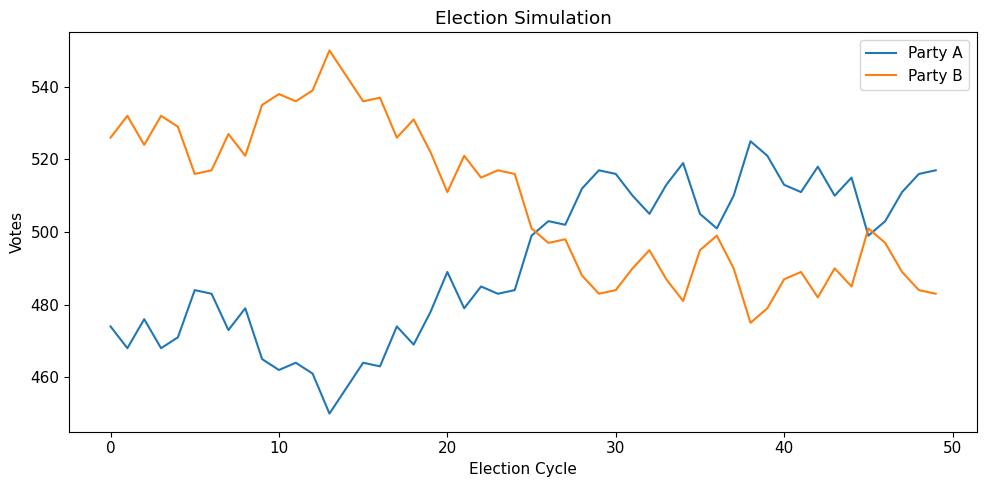

In [9]:
# TODO: Create children class for Voter
# NOTE: Assume the voters can be split into three political category: Left, Central, and Right
# NOTE: Assume the Race and Ethnicity of the voters are either Malay, Chinese, Indian, or Others


class Voter:
    """
    Represents an individual voter in the election model.

    Attributes:
        preference (str): The voter's current political preference.
    """

    def __init__(self, preference):
        """
        Initializes a Voter instance with a given preference.

        Parameters:
            preference (str): The initial political preference of the voter.
        """
        self.preference = preference

    def possibly_change_preference(self, influencers, change_probability):
        """
        Determines if the voter changes their preference based on influencers.

        The method randomly decides, based on the change_probability, whether to change
        the voter's preference to match that of a randomly selected influencer.

        Parameters:
            influencers (list of Voter): A list of Voter instances representing influencers.
            change_probability (float): Probability of the voter changing preference.
        """
        if random.random() < change_probability:
            influencer = random.choice(influencers)
            self.preference = influencer.preference


class ElectionModel:
    """
    Simulates an election with voters and influencers affecting voting preferences.

    Attributes:
        voters (list of Voter): A list of Voter instances representing the electorate.
        influencers (list of Voter): A list of Voter instances representing influential agents.
        change_probability (float): Probability of a voter changing their preference.
    """

    def __init__(self, num_voters, num_influencers, change_probability):
        """
        Initializes the ElectionModel with specified number of voters, influencers, and change probability.

        Parameters:
            num_voters (int): The number of voters in the simulation.
            num_influencers (int): The number of influencers in the simulation.
            change_probability (float): The probability of a voter changing their preference.
        """
        self.voters = [
            Voter(random.choice(["Party A", "Party B"])) for _ in range(num_voters)
        ]
        self.influencers = [
            Voter(random.choice(["Party A", "Party B"])) for _ in range(num_influencers)
        ]
        self.change_probability = change_probability

    def run_election_cycle(self):
        """
        Runs a single election cycle.

        During each cycle, each voter may change their preference based on the influence of the influencers.
        """
        for voter in self.voters:
            voter.possibly_change_preference(self.influencers, self.change_probability)

    def count_votes(self):
        """
        Counts the current votes for each party among all voters.

        Returns:
            tuple: A tuple containing the count of votes for each party (Party A, Party B).
        """
        return sum(voter.preference == "Party A" for voter in self.voters), sum(
            voter.preference == "Party B" for voter in self.voters
        )

    def simulate_election(self, cycles):
        """
        Simulates a specified number of election cycles and returns the voting results.

        Parameters:
            cycles (int): The number of election cycles to simulate.

        Returns:
            tuple of lists: Two lists containing the number of votes for each party after each cycle.
        """
        results_a, results_b = [], []
        for _ in range(cycles):
            self.run_election_cycle()
            votes_a, votes_b = self.count_votes()
            results_a.append(votes_a)
            results_b.append(votes_b)
        return results_a, results_b


# Parameters
num_voters = 1000
num_influencers = 10
change_probability = 0.1
cycles = 50

# Simulation
model = ElectionModel(num_voters, num_influencers, change_probability)
results_party_a, results_party_b = model.simulate_election(cycles)

# Plotting Results
plt.plot(results_party_a, label="Party A")
plt.plot(results_party_b, label="Party B")
plt.xlabel("Election Cycle")
plt.ylabel("Votes")
plt.title("Election Simulation")
plt.legend()
plt.show()